**Steps followed in the Notebook**

**1) Visualization examples of Exercise.**

**2) Importing the new dataset.**

**3) Questions of Stakeholders.**

### Step 1

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Arjun\Documents\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\Arjun\\Documents\\Instacart Basket Analysis'

In [4]:
#Importing the orders_products pickle file
ords_prods_merge = pd.read_pickle(os.path.join(path,'Data','Prepared Data','orders_products_merged_updated.pkl'))

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,prior_order_median,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly Busy,Normal Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer.
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly Busy,Slowest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer.
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly Busy,Slowest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer.
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least Busy,Slowest Days,Average Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer.
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least Busy,Slowest Days,Most Orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer.


### Bar Charts

<AxesSubplot: >

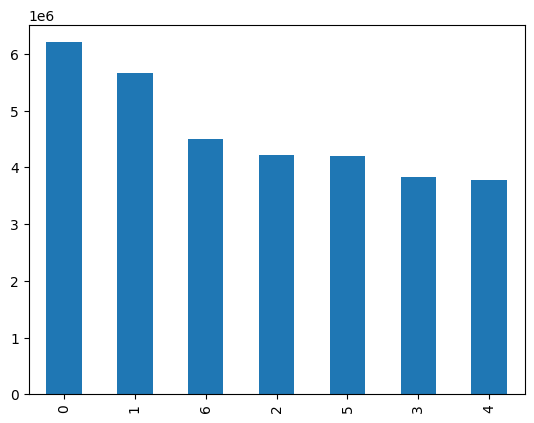

In [6]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot: >

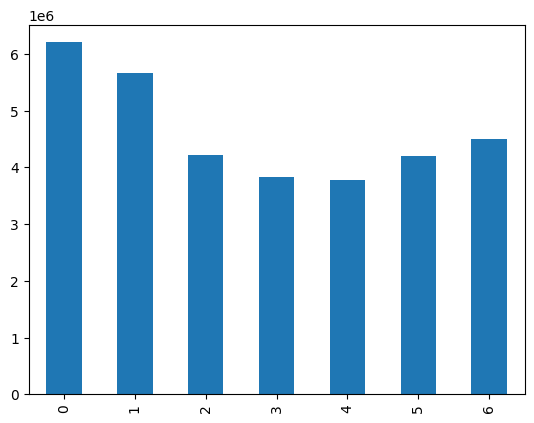

In [7]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

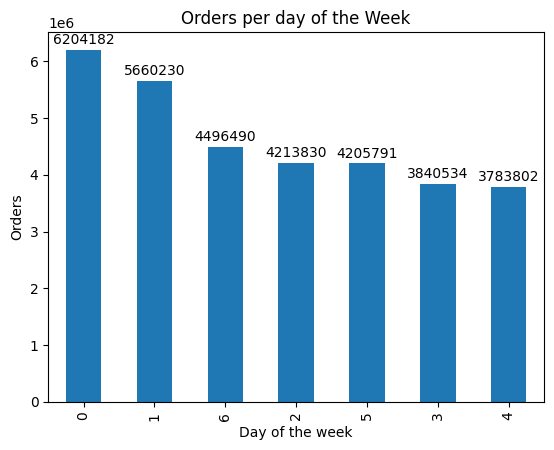

In [8]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar()
plt.title('Orders per day of the Week')

plt.xlabel('Day of the week')
plt.ylabel('Orders')



for container in bar.containers:
    bar.bar_label(container,fmt = '%i',padding=2)


In [9]:
bar

<AxesSubplot: title={'center': 'Orders per day of the Week'}, xlabel='Day of the week', ylabel='Orders'>

In [10]:
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_order_dow.png'),bbox_inches='tight')

### Histograms

<AxesSubplot: ylabel='Frequency'>

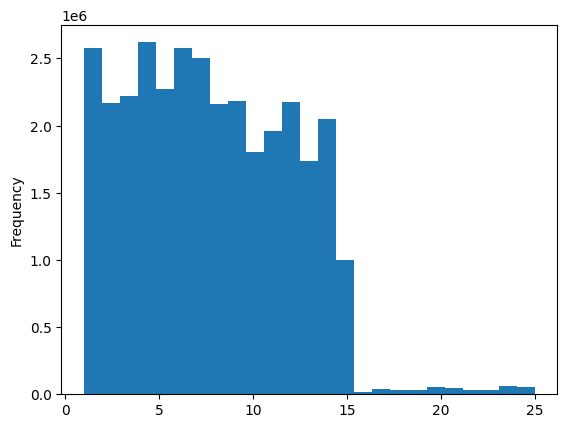

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

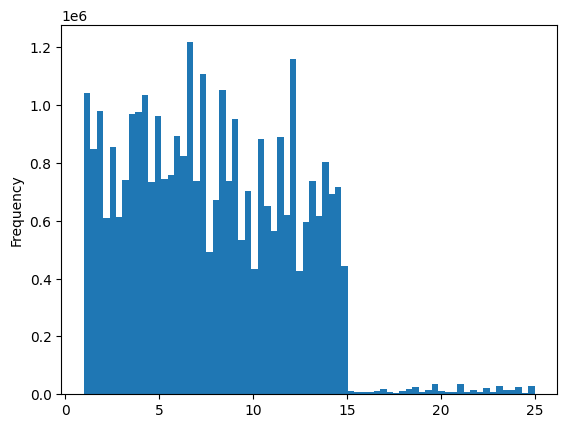

In [12]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
hist2.figure.savefig(os.path.join(path,'Analysis','Visualizations','Histogram_prices.png'))

In [14]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     7.791115e+00
std      4.241491e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Scatterplots

In [15]:
#sns.scatterplot(x='prices', y = 'prices', data = ords_prods_merge)

In [16]:
#Checking the outliers in the dataset, i.e., price above 100
ords_prods_merge[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,prior_order_median,order_frequency_flag


In [17]:
ords_prods_merge['prices'].max()

25.0

## Sampling

In [18]:
np.random.seed(4)

In [19]:
#Create a list holding True and False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
#Store 70% of the population in the big variable
big = ords_prods_merge[dev]

In [22]:
#Store 30% of the population in the small variable
small = ords_prods_merge[~dev]

In [23]:
len(ords_prods_merge)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
#Creating a dataframe of only order dow and prices from small
df_2 = small[['order_day_of_week','prices']]

In [26]:
#ax = plt.axes()
#line = sns.lineplot(data = df_2,x='order_day_of_week',y='prices', ax= ax)
#ax.set_title('Prices of Products per day of the week')


In [27]:
#line.figure.savefig(os.path.join(path,'Analysis','Visualizations','Prices of Orders per day of the week.png'),bbox_inches='tight')

## Step 2

In [28]:
#Importing the new dataset which has merged customer data
instacart_with_customers = pd.read_pickle(os.path.join(path,'Data','Prepared Data','instacart_with_customers.pkl'))

In [29]:
#Validating the import
instacart_with_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer.,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Question 3 - Descriptive Findings about Sales

Text(0, 0.5, 'Number of Orders')

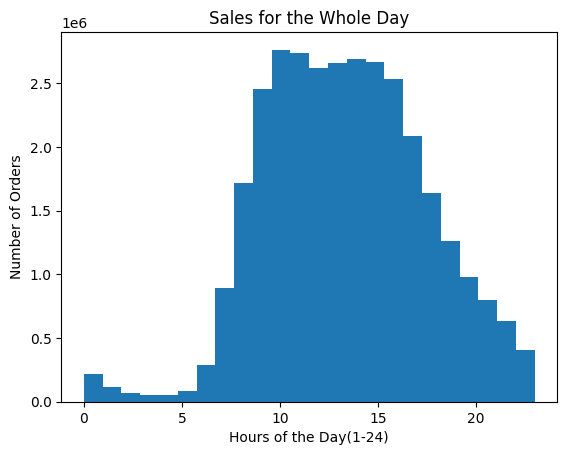

In [30]:
#Histogram of the hour of the day for orders

df_hist_hour = instacart_with_customers['order_hour_of_day'].plot(kind = 'hist',bins = 24, xlabel = 'Hour of the Day')
plt.title('Sales for the Whole Day')

plt.xlabel('Hours of the Day(1-24)')
plt.ylabel('Number of Orders')


In the Above Histogram, I have used the number of bins to be 24, marking the number of hours in the whole Day. Based on teh above Histogram, we can see that the orders are more from hours 10-17 i.e,- 10AM - 5PM which seems to be the actual shopping time for majority of people in general. 

In [31]:
#Exporting the above histogram
df_hist_hour.figure.savefig(os.path.join(path,'Analysis','Visualizations','Orders_hour_of_day.png'))

### Question 4 - Bar chart of Distribution of Orders based on Customer Loyalty

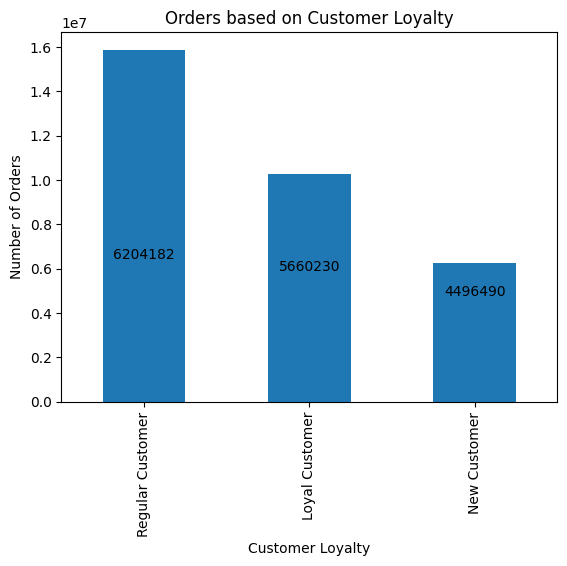

In [32]:
# Bar Chart of distribution of Orders
bar_loyalty = instacart_with_customers['loyalty_flag'].value_counts().plot.bar()
plt.title('Orders based on Customer Loyalty')

plt.xlabel('Customer Loyalty')
plt.ylabel('Number of Orders')



for container in bar.containers:
    bar_loyalty.bar_label(container,fmt = '%i',padding=2)


In [33]:
#Exporting the bar chart to the Visualization folder
bar_loyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_loyalty.png'), bbox_inches='tight')

## Question 5

In [34]:
#Line Chart sampling
small.shape

(9721098, 24)

Here, the code sampling used is the small dataset to determine the difference in Expenditure based on the hour of the day.

In [35]:
df_line = small[['prices','order_hour_of_day']]

In [36]:
#Validating the above subset of the dataset
df_line.shape

(9721098, 2)

In [37]:
df_line.head()

,prices,order_hour_of_day
0,9.0,8
2,9.0,12
3,9.0,7
6,9.0,9
10,9.0,9


In [38]:
#Charting the line chart
#ax = plt.axes()
#new_line = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices', ax = ax)
#ax.set_title('Prices and Orders_Hour_of_Day')

In [39]:
#Exporting the line chart
#new_line.figure.savefig(os.path.join(path,'Analysis','Visualizations','line_hour_of_day.png'))

In [40]:
#df_line = small[['prices','order_day_']]

## Question 6 - Exploratory analysis of customer demographics

In [41]:
#Connection between age and family connection using line chart

As before, for performing the line chart we will sample the dataset. 

In [42]:
#Removing certain columns to not get the Memory Error once running the Line chart Error
#instacart_with_customers.drop(['_merge','Busiest_days','prior_order_median','order_frequency_flag'], axis = 1)

In [43]:
# This will result in an Index error because we did not sample the whole merged dataset while using new_small. We will perform those
#steps in the following cells

In [44]:
np.random.seed(4)

In [45]:
#new_dev = np.random.rand(len(instacart_with_customers)) <= 0.7

In [46]:
#30% of the dataset will be transferred to small dataset
#new_small = instacart_with_customers[~new_dev]

In [47]:
#Sampling the dataset

#line_customer = new_small[['age','number_dependents']]

NameError: name 'new_small' is not defined

In [ ]:
#ax = plt.axes()
#line_demographics = sns.lineplot(data = line_customer,x='age',y='number_dependents', ax = ax)
#ax.set_title('Age and Number of dependents')

 As we can see from the above line chart, there is no clear pattern in age and number of dependents. It is not possible to form a
 marketing campaign on the customer demographics. Foe example, there is a dip in the number of dependents around age 20-25 during which
 the children might move out of the house for their undergraduates/college education. However, there is an increase in dependents
for age 24 which is not possible to explain through Line chart. Hence, we need to do further analysis before conclusion and recommending
 any targeted marketing campaigns.

In [ ]:
# Exporting the line chart 
line_demographics.figure.savefig(os.path.join(path,'Analysis','Visualizations','customer_demographics.png'))

### Question 7 - Connection between Age and Spending power

Text(0.5, 1.0, 'Age and Income')

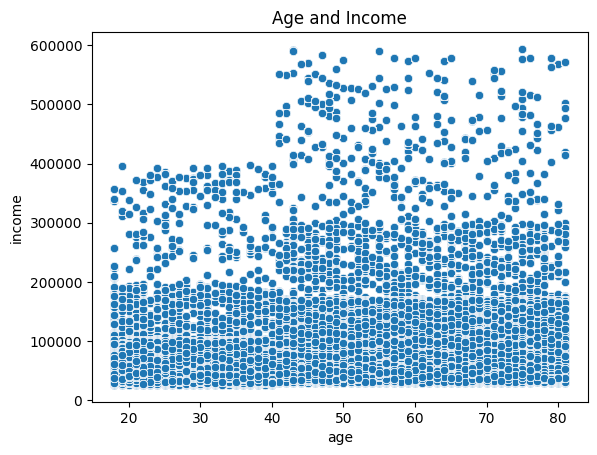

In [48]:
#Creating a scatterplot of age and income
ax = plt.axes()
income_scatter = sns.scatterplot(x = 'age',y='income',data = instacart_with_customers, ax = ax)
ax.set_title('Age and Income')

From the above scatterplot, we can analyze that majority of the points are located below 200K. As for the pattern between age and spending power, it seems that after age 40 people tend to have a higher spending power. This might be due to many reasons like higher salaries of C-level positions within the company, financial assets growing and saving/retirement income.

In [49]:
# Exporting the scatterplot to the Visualizations folder
income_scatter.figure.savefig(os.path.join(path,'Analysis','Visualizations','income_and_age_scatter.png'))

### Question 8

In [ ]:
# All the Visualizations have been exported to the Visualizations folder during their individual questions.